# Make 1-D particle in a 4 well potential using equation of velocity verlet 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
from sympy import *

In [2]:
# functions 

def ke(v):
    return (m*v*v)/2

def pe(x):
    if(x<= -1.25):
        return 4*pie*pie*(x+1.25)*(x+1.25)
    if(x > -1.25 and x <= -0.25):
        return 2*(1+math.sin(2*pie*x))
    if(x > -0.25 and x <= 0.75):
        return 3*(1+math.sin(2*pie*x))
    if(x > 0.75 and x <= 1.75):
        return 4*(1+math.sin(2*pie*x))
    return 8*pie*pie*(x-1.75)*(x-1.75)

def find_acc(x):
    if(x<= -1.25):
        return -4*pie**2*(2.0*x + 2.5)
    if(x > -1.25 and x <= -0.25):
        return -4*pie*math.cos(2*pie*x)
    if(x > -0.25 and x <= 0.75):
        return -6*pie*math.cos(2*pie*x)
    if(x > 0.75 and x <= 1.75):
        return -8*pie*math.cos(2*pie*x)
    return -8*pie**2*(2.0*x - 3.5)

In [25]:
# initial conditions 
s = 1000
m = 1
t = 0.01
k = 10
vi = 4
pie = np.pi
X = np.zeros(s)
V = np.zeros(s)
H = np.zeros(s)
x1 = np.linspace(0, 1, s)
x2 = np.linspace(-3, 3, s)

X[0] = 1.75
kb = 1
T = 10
KE = 1.5*kb*T
H[0] = KE + pe(X[0])
V[0] = math.sqrt((2*(H[0] - pe(X[0])))/m)

In [26]:
for i in range(s-1):
    cur_x = X[i]
    cur_v = V[i]
    a1 = find_acc(cur_x)
    cur_xx = cur_x + t*cur_v + (t*t*a1)/2
    X[i+1] = cur_xx
    a2 = find_acc(cur_xx)
    cur_vv = cur_v + ((a1+a2)*t)/2
    V[i+1] = cur_vv
    
    
H = [pe(X[i]) + ke(V[i]) for i in range(s)]


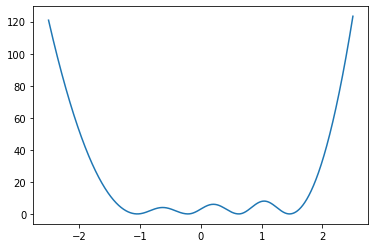

In [27]:
plt.plot(np.linspace(-2.5, 2.5, 1000), np.array([pe(xi) for xi in x2]))

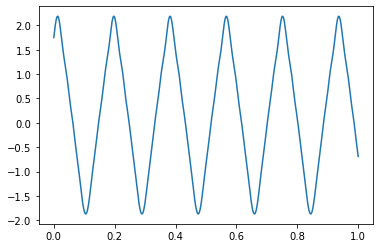

In [28]:
plt.plot(x1, X)

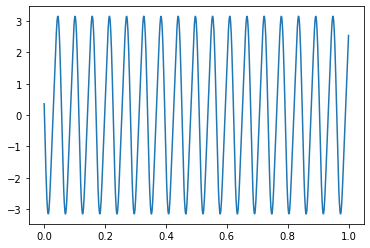

In [ ]:
plt.plot(x1, V)

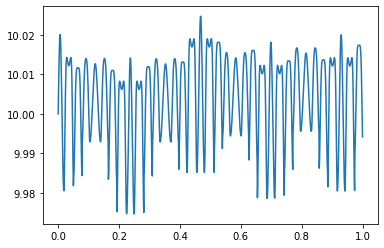

In [ ]:
plt.plot(x1, H)

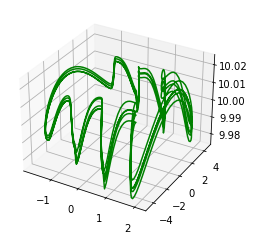

In [ ]:
ax = plt.axes(projection ='3d')
ax.plot3D(X, V, H, 'green')